<a href="https://colab.research.google.com/github/apoorv2512/INBT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task2

In [106]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df=pd.read_csv('/content/drive/MyDrive/iNeuBytes/AQI.csv')

In [24]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 3.3+ MB


In [26]:
df.shape

(43824, 10)

In [27]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,43824.0,2012.000000,1.413842,2010.00,2011.00,2012.00,2013.00,2014.0
month,43824.0,6.523549,3.448572,1.00,4.00,7.00,10.00,12.0
day,43824.0,15.727820,8.799425,1.00,8.00,16.00,23.00,31.0
hour,43824.0,11.500000,6.922266,0.00,5.75,11.50,17.25,23.0
pm2.5,41757.0,98.613215,92.050387,0.00,29.00,72.00,137.00,994.0
DEWP,43824.0,1.817246,14.433440,-40.00,-10.00,2.00,15.00,28.0
TEMP,43824.0,12.448521,12.198613,-19.00,2.00,14.00,23.00,42.0
PRES,43824.0,1016.447654,10.268698,991.00,1008.00,1016.00,1025.00,1046.0
Iws,43824.0,23.889140,50.010635,0.45,1.79,5.37,21.91,585.6


In [28]:
df.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
dtype: int64

In [109]:
df['pm2.5'].fillna(df[ "pm2.5"].mean(),inplace=True)

In [111]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
dtype: int64

In [113]:
# Encoding categorical variable
cat_values=[]
cont_values=[]
for columns in df.columns:
    if df[columns].nunique()<=10:
        cat_values.append(columns)
    else:
        cont_values.append(columns)

In [114]:
cat_values

['year', 'cbwd']

In [116]:
cont_values

['month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws']

In [117]:
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [118]:
df1=pd.get_dummies(df,columns=cat_values,drop_first=True)

In [120]:
df1.head()

,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
0,1,1,0,98.613215,-21,-11.0,1021.0,1.79,0,0,0,0,1,0,0
1,1,1,1,98.613215,-21,-12.0,1020.0,4.92,0,0,0,0,1,0,0
2,1,1,2,98.613215,-21,-11.0,1019.0,6.71,0,0,0,0,1,0,0
3,1,1,3,98.613215,-21,-14.0,1019.0,9.84,0,0,0,0,1,0,0
4,1,1,4,98.613215,-20,-12.0,1018.0,12.97,0,0,0,0,1,0,0


In [122]:
# scaling numerical variables
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1[cont_values]=ss.fit_transform(df1[cont_values])

EDA

Text(0, 0.5, 'counts')

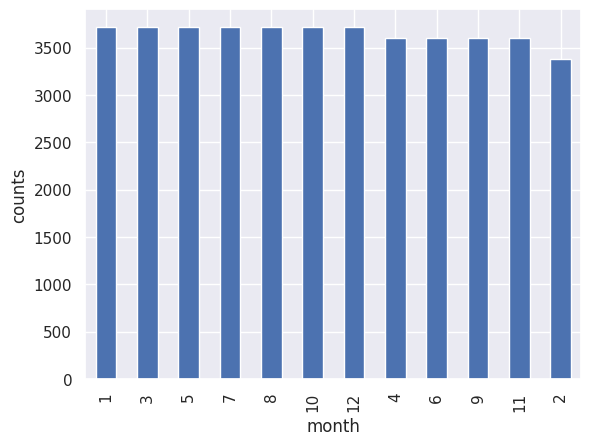

In [123]:
df['month'].value_counts().plot.bar()
plt.xlabel('month')
plt.ylabel('counts')

<Axes: xlabel='cbwd', ylabel='Count'>

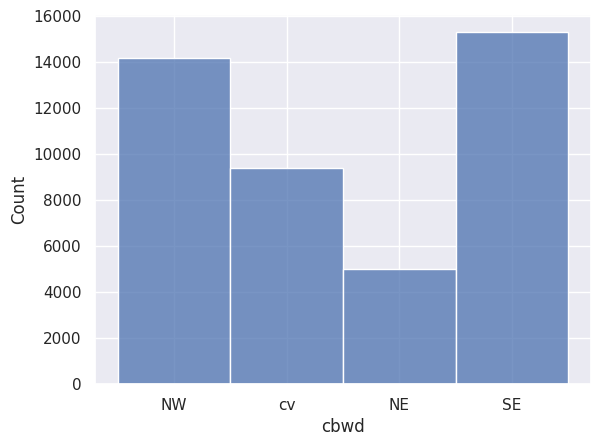

In [127]:
sns.histplot(data=df['cbwd'])

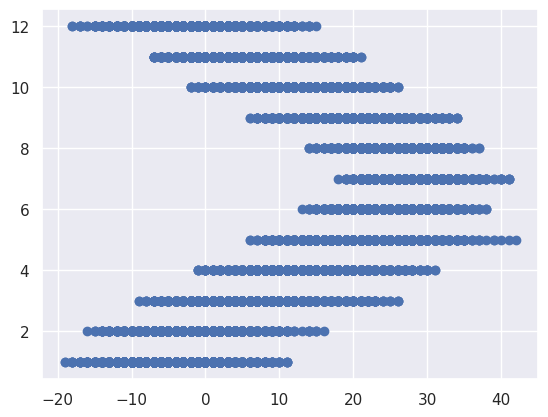

In [129]:
plt.scatter(x=df['TEMP'],y=df['month'])

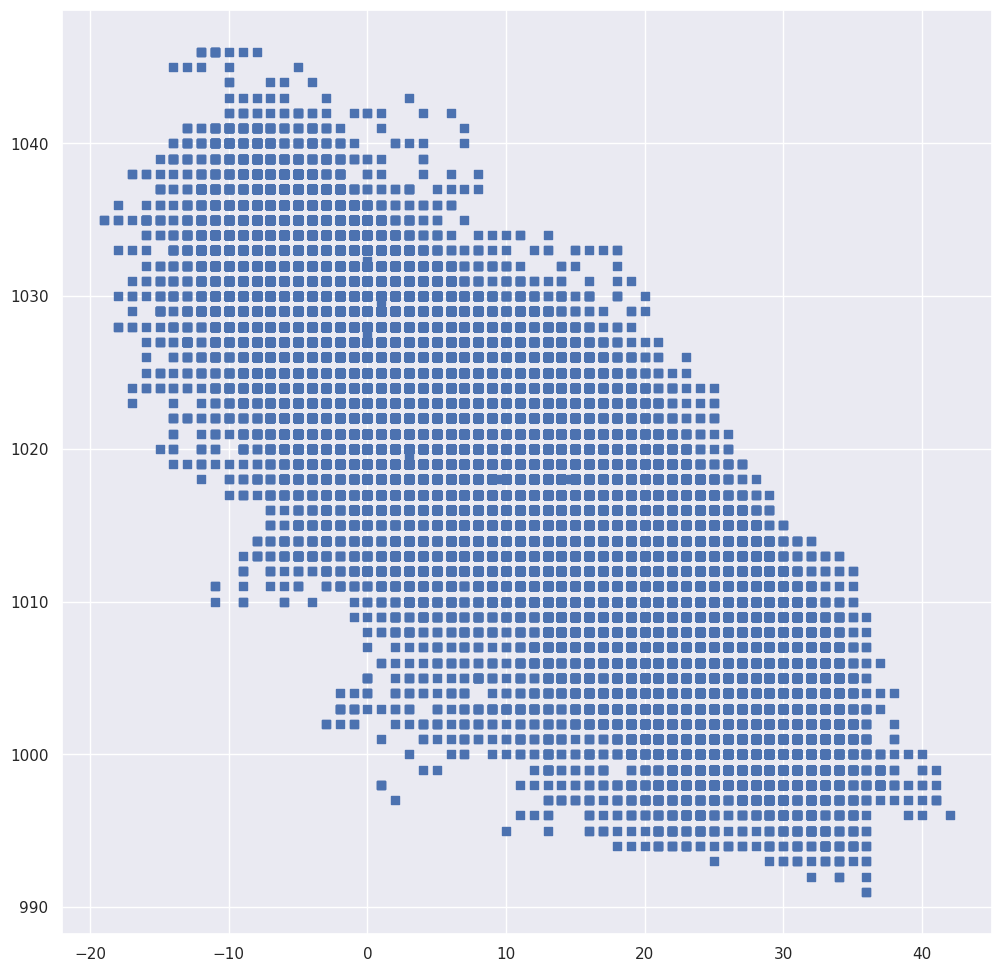

In [131]:
plt.figure(figsize=(12,12))
plt.scatter(x=df['TEMP'],y=df['PRES'],marker='s')

Model Implementation

In [132]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

In [134]:
X=df1.drop('pm2.5',axis=1)
Y=df1['pm2.5']

In [135]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [136]:
X_train

,month,day,hour,DEWP,TEMP,PRES,Iws,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
11652,-0.441796,-1.673744,0.072232,-0.264475,1.028938,-0.530517,3.857241,1,0,0,0,1,0,0
16602,1.298074,0.826448,0.939010,-0.888034,-1.020498,1.417172,-0.459890,1,0,0,0,0,1,0
22761,0.428139,-1.105519,-0.361158,1.606202,1.438826,-0.627901,-0.441894,0,1,0,0,0,0,0
3092,-0.441796,-0.764584,1.227936,-0.610897,0.455096,-0.725286,0.264364,0,0,0,0,1,0,0
8008,1.298074,1.621963,0.650084,-0.125907,-0.856543,-0.043595,-0.459890,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,1.588052,1.281028,1.083473,-0.749466,-1.020498,0.930250,-0.424097,0,0,0,1,0,0,1
32511,0.718117,0.030932,0.505621,0.636221,1.110916,-0.725286,-0.272128,0,0,1,0,0,1,0
5192,0.428139,-1.219164,-0.505621,1.259780,1.028938,-1.017439,-0.021778,0,0,0,0,1,0,0
12172,-0.441796,0.826448,-1.083473,0.220515,0.127186,-0.433132,-0.406101,1,0,0,0,0,1,0


In [137]:
Y_train

11652   -0.552164
16602   -0.897175
22761   -0.196024
3092    -0.184895
8008     1.540159
           ...   
43723    2.552933
32511   -0.685717
5192    -0.730234
12172   -0.229412
33003    0.983690
Name: pm2.5, Length: 35059, dtype: float64

In [138]:
X_test

,month,day,hour,DEWP,TEMP,PRES,Iws,year_2011,year_2012,year_2013,year_2014,cbwd_NW,cbwd_SE,cbwd_cv
19638,-1.021753,1.508318,-0.794547,-0.195191,-0.364679,-0.335748,-0.459890,0,1,0,0,0,0,1
35311,-1.601710,-0.537294,-0.650084,-1.511594,-1.922250,1.417172,-0.397303,0,0,0,1,1,0,0
1113,-1.311731,0.030932,-0.361158,-1.442309,-1.594341,1.611941,-0.218539,0,0,0,0,1,0,0
17035,1.588052,-0.537294,1.083473,-0.818750,-0.446656,0.930250,0.666483,1,0,0,0,1,0,0
26039,1.588052,0.485512,1.661325,-0.472328,-1.348408,1.125019,-0.459890,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35291,-1.601710,-0.650939,-0.072232,-1.719447,-1.184453,1.514556,-0.442094,0,0,0,1,0,0,1
33164,1.008096,-0.310003,1.227936,0.566937,0.127186,0.248559,-0.459890,0,0,1,0,0,0,1
34660,1.588052,-0.082713,-1.083473,-1.511594,-1.430386,1.611941,-0.280926,0,0,1,0,1,0,0
18795,-1.311731,0.826448,-1.227936,-1.165172,-1.594341,1.027634,-0.379306,0,1,0,0,1,0,0


In [139]:
Y_test

19638   -0.207154
35311    0.404962
1113    -0.808140
17035   -0.574423
26039    2.397121
           ...   
35291   -0.418612
33164   -0.440870
34660   -0.630070
18795   -0.919434
18895    0.816749
Name: pm2.5, Length: 8765, dtype: float64

In [140]:
print(X_train.shape)

(35059, 14)


In [141]:
print(X_test.shape)

(8765, 14)


Ridge regressor

In [142]:
RR = Ridge(alpha=0.1)
RR.fit(X_train,Y_train)
predicted_train_RR=(RR.predict(X_train))
predicted_test_RR=(RR.predict(X_test))

Random Forest Regressor

In [143]:
regressor=RandomForestRegressor(random_state=0,
                                n_estimators=100,
                                max_depth=5,
                                min_samples_split=4,
                                bootstrap=True)
regressor.fit(X_train,Y_train)
predicted_train_regressor=(regressor.predict(X_train))
predicted_test_regressor=(regressor.predict(X_test))

Model Evaluation

Ridge Regressor

In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_RR))
print(" Mean squared error  :    ",mean_squared_error(Y_train,predicted_train_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_RR)))


 Training DataSet 
 Mean absolute error :     0.6210124441271956
 Mean squared error  :     0.7405023962720664
 Root mean squared error:  0.8605244890600536


In [146]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_RR))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_RR))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_RR)))

 Testing DataSet 
 Mean absolute error :     0.6238690386653084
 Mean squared error :      0.7543686422652472
 Root mean squared error:  0.8685439783138487


Random Forest Regressor

In [147]:
print(" Training DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_train,predicted_train_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_train,predicted_train_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_train,predicted_train_regressor)))


 Training DataSet 
 Mean absolute error :     0.5630747639028765
 Mean squared error :      0.6240026916920072
 Root mean squared error:  0.78993841006246


In [148]:
print(" Testing DataSet ")
print(" Mean absolute error :    ",mean_absolute_error(Y_test,predicted_test_regressor))
print(" Mean squared error :     ",mean_squared_error(Y_test,predicted_test_regressor))
print(" Root mean squared error: ",np.sqrt(mean_squared_error(Y_test,predicted_test_regressor)))


 Testing DataSet 
 Mean absolute error :     0.5653367247288628
 Mean squared error :      0.6324143786059353
 Root mean squared error:  0.7952448544982452


Overfitting

In [149]:
print(" Accuracy on training data set")
print(" Accuracy on Ridge Regressor training data set :         ",RR.score(X_train,Y_train))
print(" Accuracy on Random Forest Regressor training data set : ",regressor.score(X_train,Y_train))
acc_rr_train  = RR.score(X_train,Y_train)
acc_rfr_train =regressor.score(X_train,Y_train)

 Accuracy on training data set
 Accuracy on Ridge Regressor training data set :          0.2564245188518024
 Accuracy on Random Forest Regressor training data set :  0.37340769719510813


In [150]:
print(" Accuracy on test data set")
print(" Accuracy on Ridge Regressor test data set :         ",RR.score(X_test,Y_test))
print(" Accuracy on Random Forest Regressor test data set : ",regressor.score(X_test,Y_test))
acc_rr_test=RR.score(X_test,Y_test)
acc_rfr_test=regressor.score(X_test,Y_test)

 Accuracy on test data set
 Accuracy on Ridge Regressor test data set :          0.2578218761914026
 Accuracy on Random Forest Regressor test data set :  0.37780537168948547


In [151]:
if acc_rr_train > acc_rr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS OVERFITTED


In [152]:
if acc_rfr_train > acc_rfr_test:
    print('RIDGE REGRESSOR MODEL IS NOT OVERFITTED!')
else:
    print( 'RIDGE REGRESSOR MODEL IS OVERFITTED')

RIDGE REGRESSOR MODEL IS OVERFITTED
